# SCIKIT-LEARN TUTORIAL 

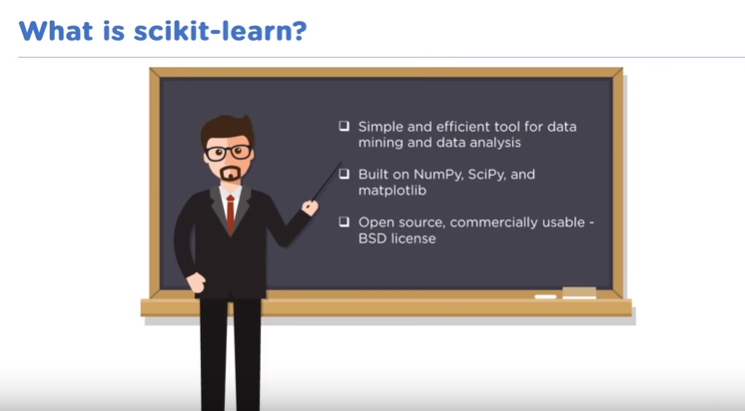

In [1]:
from IPython.display import Image
Image(filename='Pictures/M90.PNG')

BSD - Berkley software distribution liscence

What we can achieve using stickit learn?

1. classification - identifying which category an object belongs to

*Application: Spam detection
2. Regression - predicting an attribute associated with an object

*Application: stock prices prediction

3. Clustering - automatic grouping of similar objects into sets

*Application: Customer segmentation

4. Model Selection - comparing, validating and choosing parameters and models

*Application : improving model accuracy via parameter tuning

5. Dimensionality reduction - reducing the number of random variables to consider

*Application: to increase model efficiency (if we have 1000 of features, column coming in , lots of same rows)

6. Pre-Processing - feature extraction and normalization

*Application: transforming input data such as text for use with machine learning algorithms - (sample scaling)

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns #sits on top of matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# if we wanna erase some row and clear data then it is not just enough to cut that row, also we need to go to kernel and restart entire code

In [4]:
wine = pd.read_csv('Data/winequality-red.csv', sep=';')
#we need to set seperator because data is separated with ;

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# 11 features
#we wanna understand quality

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#non-null float64 - no null values here
# 1. we can delete null data if we have enough data
# 2. fill that information with avregae

In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#preprocessing data - creating bins - we are gonna take values
# (2,3,4,5,6)- quality - creating 2 bins - spread 6.5 - exact index of 8

bins= (2, 6.5, 8) # we are gonna take values which comes from 2 to 8, 2 means 2 bins, spread 6.5 (value of border from bad to good wine - we are looking for really good wines, index 8 - values from 0 to 8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels = group_names)

In [11]:
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [12]:
# bad is gonna be 0 and good 1

In [13]:
# we input from sklearn LabelEncoder and this library set data to 0 and 1

label_quality = LabelEncoder()

In [14]:
# apply to the data

wine['quality']=label_quality.fit_transform(wine['quality'])

In [15]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [16]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [17]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [18]:
# we are looking for good wines

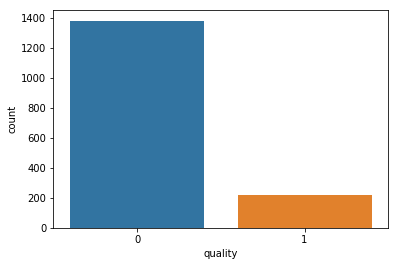

In [19]:
sns.countplot(wine['quality'])

In [20]:
# separate data set

X = wine.drop('quality', axis=1) # all features without quality
y = wine['quality']

In [21]:
#train and test splitting data
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
# applying standard scaling to get optimizes results

sc = StandardScaler() # total sulfur dioxide - huge numbers
                      # clhorides - small numbers
#really important!!!!
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
X_train[:10] #first 10 variables

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

In [27]:
X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

# 3 models!!

# Random Forest Classifier

Least amount of moving parts to find tune!

In [29]:
rfc = RandomForestClassifier(n_estimators=200)#how many trees in the forest?
#usualyy start with the higher number and then we can lower it
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
pred_rfc=rfc.predict(X_test)

In [31]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [32]:
# let's see how well our model performed

In [34]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       273
          1       0.73      0.51      0.60        47

avg / total       0.89      0.90      0.89       320

[[264   9]
 [ 23  24]]


# SVM Classifier

In [35]:
clf=svm.SVC()

In [36]:
clf.fit(X_train,y_train)
clf_predict=clf.predict(X_test)

In [37]:
print(classification_report(y_test,clf_predict))
print(confusion_matrix(y_test,clf_predict))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


SVM vs. RANDOM FOREST

* SVM is better with smaller numbers , faster
* RANDOM FOREST - better with data that is turned in numbers

# NEURAL NETWORK

- Can handle huge amounts of data
- text analysist
- predict stock market - random data from different sources
- tweeter feeds, news feeds, reports on different releases
- picture proccess
- requires a lot of data!!!

In [38]:
nlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
#more hidden layers - more resources
# can come to overfitting if we use too many hidden layers
# max_iter

In [39]:
nlpc.fit(X_train,y_train)
pred_nlpc=nlpc.predict(X_test)

In [40]:
print(classification_report(y_test,pred_nlpc))
print(confusion_matrix(y_test,pred_nlpc))

             precision    recall  f1-score   support

          0       0.91      0.92      0.92       273
          1       0.52      0.49      0.51        47

avg / total       0.86      0.86      0.86       320

[[252  21]
 [ 24  23]]


In [42]:
# 3 models most used today!!

In [43]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_rfc)
cm

0.9

In [45]:
#we wanna use that in the future
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [48]:
Xnew= [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
#first we need transform the data that we wanna feed in
Xnew=sc.transform(Xnew)
#then we predict data
ynew=rfc.predict(Xnew)
ynew

array([0], dtype=int64)

In [ ]:
# bad wine